<a href="https://colab.research.google.com/github/KhushiAgg/NEP-Sentimental-Analysis/blob/main/NEP_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gathering Twitter data on NEP and performing sentiment analysis




##Data gathering

In [ ]:
#importing important libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud

import pandas as pd
import numpy as np

import itertools
import collections

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re                                  # library for regular expression operations
import string                              # for string operations

# import spacy
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [ ]:
# #Load the data
from google.colab import files
uploaded = files.upload()

Saving twitter_login.csv to twitter_login.csv


In [ ]:
#Get the data
log = pd.read_csv('twitter_login.csv')
#log.head()

In [ ]:
# Twitter API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#create the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
#Extract tweets with hashtag #nationaleducationpolicy" , "#nep" , "#nationaleducationpolicy2020
hashtags = ["#nationaleducationpolicy" ,  "#nep" , "#nationaleducationpolicy2020", "national education policy", "nep" "#NEP2020"]

msgs = []
msg= []
for words in hashtags:

  for tweet in tweepy.Cursor(api.search, q=words, rpp=100, lang = "en", tweet_mode="extented").items(1500):
      msg = [tweet.text] 
      # print(msg)
      msg = tuple(msg)                    
      msgs.append(msg)

df = pd.DataFrame(msgs, columns = ['Tweets'])
df.head(10)

,Tweets
0,I have come out with a book on National Educat...
1,RT @PRO_Vizag: 200 Class IX students were give...
2,Looking at the road conditions in KDMC I feel ...
3,RT @PRO_Vizag: 200 Class IX students were give...
4,RT @PRO_Vizag: 200 Class IX students were give...
5,200 Class IX students were given hands-on prac...
6,RT @tvkattimani: I have come out with a book o...
7,I have come out with a book on National Educat...
8,Successfully organized NBA Accreditation Works...
9,Just 1 hour to go for the LIVE webinar on NEP ...


In [ ]:
df = pd.read_csv('nep_tweets.csv', index_col = False)

In [ ]:
df.head()

,Unnamed: 0,Tweets
0,0,Tell us in the comments if you knew about this...
1,1,"""The #NationalEducationPolicy of India focuses..."
2,2,Guidelines for engaging Professor of Practice ...
3,3,RT @HarichandraSays: #misleading #FactCheck #f...
4,4,#Manipur: It will aid in realising the vision ...


In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
df.shape

(2186, 1)

In [ ]:
df['Tweets'][1235]

'RT @BJP4India: National Education Policy 2020: The first education policy of the 21st century.\n\nIt envisions to sustainably transform the n…'

In [ ]:
df.head(5)

,Tweets
0,Tell us in the comments if you knew about this...
1,"""The #NationalEducationPolicy of India focuses..."
2,Guidelines for engaging Professor of Practice ...
3,RT @HarichandraSays: #misleading #FactCheck #f...
4,#Manipur: It will aid in realising the vision ...


##Preprocessing the Data

In [ ]:
# #Create a function to clean the tweets
# def cleanText(text):
#   text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removed @mentions
#   text = re.sub(r'#', '', text) # Removing the '#' symbol
#   text = re.sub(r'RT[\s]', '', text) # Removing RT
#   text = re.sub(r':[\s]+', '', text) #Removing : after RT 
#   text = re.sub(r'https?:\/\/\S+', '', text) # Removing the hyper link

#   return text

# # CLeaning the text
# df['Tweets'] = df['Tweets'].apply(cleanText)
# df

In [ ]:
# df.to_csv('nep_tweets.csv', index=False)

In [ ]:
# df = pd.read_csv('nep_tweets.csv')

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def process_tweets(tweets):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    tweets = re.sub(r'\$\w*', '', tweets)
    tweets = re.sub(r'^RT[\s]+', '', tweets)
    tweets = re.sub(r'https?:\/\/.*[\r\n]*', '', tweets)
    tweets = re.sub(r'#', '', tweets)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
    tweets_tokens = tokenizer.tokenize(tweets)

    tweets_clean = []
    for word in tweets_tokens:
        if (word not in stopwords_english and  
                word not in string.punctuation): 
            stem_word = stemmer.stem(word)  # stemming word
#             print(stem_word[0])
            tweets_clean.append(stem_word)
#     listToStr = ' '.join(map(str, tweets_clean))

    return tweets_clean

In [ ]:
#CLeaning the text
df['Tweets'] = df['Tweets'].apply(process_tweets)

In [ ]:
def tostring(string):
    li = ' '.join(map(str, string))
    return li
  
df.Tweets = df.Tweets.apply(tostring)

In [ ]:
df['Tweets'].head()

0    tell us comment knew want know learn skill fut...
1    nationaleducationpolici india focus lot holist...
2    guidelin engag professor practic univers colle...
3    mislead factcheck fakenew mkstalinera dmk trut...
4    manipur aid realis vision govern india creat s...
Name: Tweets, dtype: object

In [ ]:
df.shape

(2186, 1)

In [ ]:
int(df.shape[0]/2)

1093

In [ ]:
df_train = df.iloc[int(df.shape[0]/2):,:]
df_test = df.iloc[:int(df.shape[0]/2),:]
print(df_train)
print(df_test)    

                                                 Tweets
1093  provid univers access educ mission hon ’ ble p...
1094  ... like nation educ polici 2020 pm shri schoo...
1095  nation educ polici 2020 aim transform india ’ ...
1096  provid univers access educ goal modi-l govern ...
1097  nation educ polici 2020 first educ polici 21st...
...                                                 ...
2181  6th dean committe constitut icar necessari cur...
2182  singapor cooper programm sponsor leadership pr...
2183  hurri time run 5 day left deadlin 30th septemb...
2184  wish famili happi navratri edut technolog tran...
2185  development goal integr holist develop childre...

[1093 rows x 1 columns]
                                                 Tweets
0     tell us comment knew want know learn skill fut...
1     nationaleducationpolici india focus lot holist...
2     guidelin engag professor practic univers colle...
3     mislead factcheck fakenew mkstalinera dmk trut...
4     manipur aid reali

##Labelling positive, negative and neutral sentiment

In [ ]:
#To get the subjectivity in the text
#Subjective sentence expresses some personal feelings, views, or beliefs. 
# from textblob import TextBlob
# def getsubjectivity(text):
#   return TextBlob(text).sentiment.subjectivity

#To get the polarity in the text
#Polarity simply means emotions expressed in a sentence.
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create new columns 
# df['Subjectivity'] = df['Tweets'].apply(getsubjectivity)
df_train['Polarity'] = df_train['Tweets'].apply(getPolarity)

df_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Tweets,Polarity
1093,provid univers access educ mission hon ’ ble p...,0.000
1094,... like nation educ polici 2020 pm shri schoo...,0.000
1095,nation educ polici 2020 aim transform india ’ ...,0.000
1096,provid univers access educ goal modi-l govern ...,0.000
1097,nation educ polici 2020 first educ polici 21st...,0.125


82522


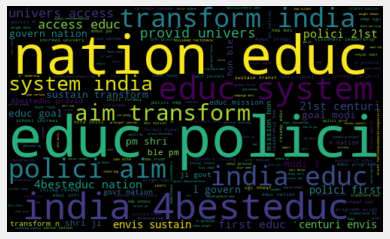

In [ ]:
#Plotting the Word Cloud
allWords = ' '.join( [twts for twts in df_train['Tweets']] )
print(len(allWords))
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Let's compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return -1
  elif score == 0:
    return 0
  else:
    return 1
df_train['Analysis'] = df_train['Polarity'].apply(getAnalysis)

df_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Tweets,Polarity,Analysis
1093,provid univers access educ mission hon ’ ble p...,0.000,0
1094,... like nation educ polici 2020 pm shri schoo...,0.000,0
1095,nation educ polici 2020 aim transform india ’ ...,0.000,0
1096,provid univers access educ goal modi-l govern ...,0.000,0
1097,nation educ polici 2020 first educ polici 21st...,0.125,1
...,...,...,...
2181,6th dean committe constitut icar necessari cur...,0.000,0
2182,singapor cooper programm sponsor leadership pr...,0.000,0
2183,hurri time run 5 day left deadlin 30th septemb...,0.000,0
2184,wish famili happi navratri edut technolog tran...,0.000,0


In [ ]:
df_train[df_train['Analysis'] == 0].shape

(838, 3)

In [ ]:
df_train[df_train['Analysis'] == 1].shape

(244, 3)

In [ ]:
df_train[df_train['Analysis'] == -1].shape

(11, 3)

In [ ]:
# Get the percentage of positive tweets
ptweets = df_train[df_train.Analysis == 1]
ptweets = ptweets['Tweets']

print("Percentage of positive tweets: " , round((ptweets.shape[0] / df.shape[0]) * 100, 1), "%" )

Percentage of positive tweets:  11.2 %


In [ ]:
# Get the percentage of negative tweets
ntweets = df_train[df_train.Analysis == -1]
ntweets = ntweets['Tweets']

print("Percentage of negative tweets: " ,round((ntweets.shape[0] / df.shape[0]) * 100, 1), "%" )

Percentage of negative tweets:  0.5 %


In [ ]:
# Get the percentage of neutral tweets
neutweets = df_train[df_train.Analysis == 0]
neutweets = neutweets['Tweets']

print("Percentage of neutral tweets: " ,round((neutweets.shape[0] / df.shape[0]) * 100, 1), "%" )

Percentage of neutral tweets:  38.3 %


Text(0.5, 1.0, 'Sentiment polarity distribution of the tweets')

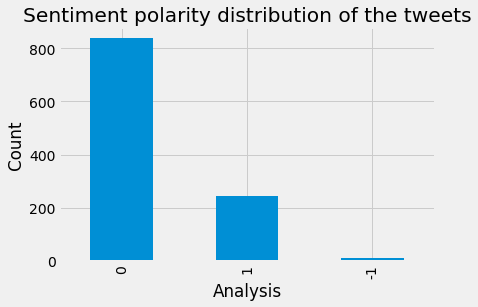

In [ ]:
df_train['Analysis'].value_counts().plot(kind='bar')
 
plt.xlabel('Analysis')
plt.ylabel('Count')
plt.title('Sentiment polarity distribution of the tweets')

In [ ]:
# # visualize percentage
# plt.subplots(figsize=(15,6))
# sns.barplot(x ="Analysis", y = "count" ,data=df_counts,palette='hot',edgecolor=sns.color_palette('dark',7))
# plt.xticks(rotation=90)
# plt.title('Sentiment polarity distribution of the tweets')
# plt.show()

In [ ]:
df_train['Tweets'][1522]

'nation educ polici 2020 aim transform india ’ educ system india 4besteduc'

In [ ]:
df_train['Tweets'][1914]

'nation educ polici 2020 aim transform india ’ educ system india 4besteduc'

In [ ]:
df_train['Tweets'][1144]

'nation educ polici 2020 aim transform india ’ educ system india 4besteduc'

##Feature Extraction


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

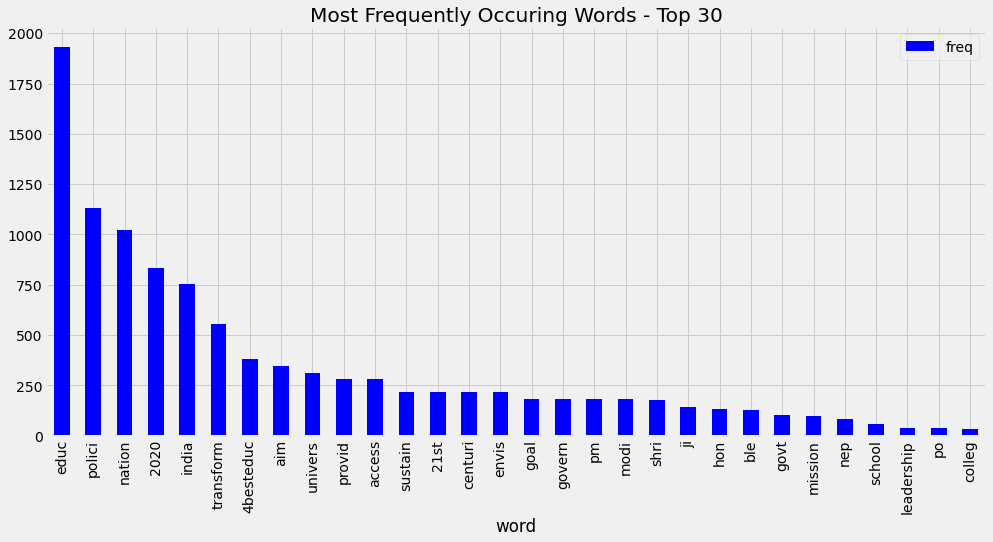

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df_train.Tweets)

# Number of word = print(len(cv.get_feature_names_out()))

sum_words = words.sum(axis=0)

# Code for graph

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color
= 'blue')

plt.title("Most Frequently Occuring Words - Top 30")

##Data Visualization

Text(0.5, 1.0, 'WordCloud - Vocabulary from TWEETS')

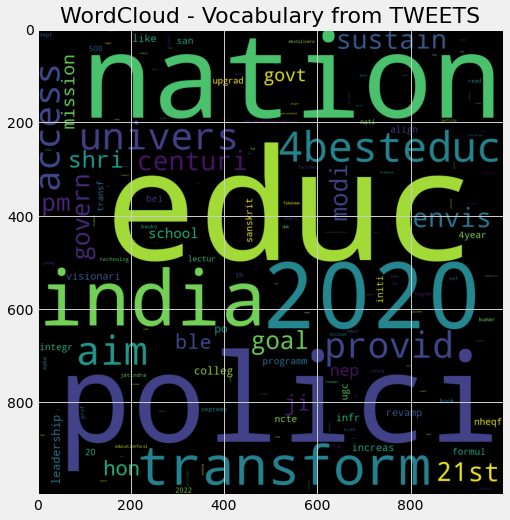

In [ ]:
wordcloud = WordCloud(width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from TWEETS", fontsize = 22)

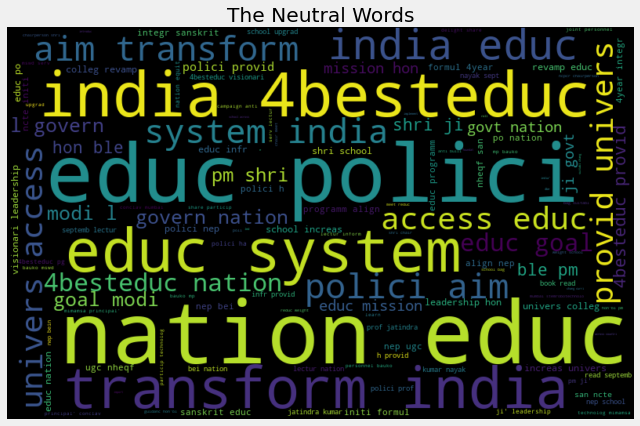

In [ ]:
neutral_words =' '.join([text for text in df_train['Tweets'][df_train['Polarity'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(neutral_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

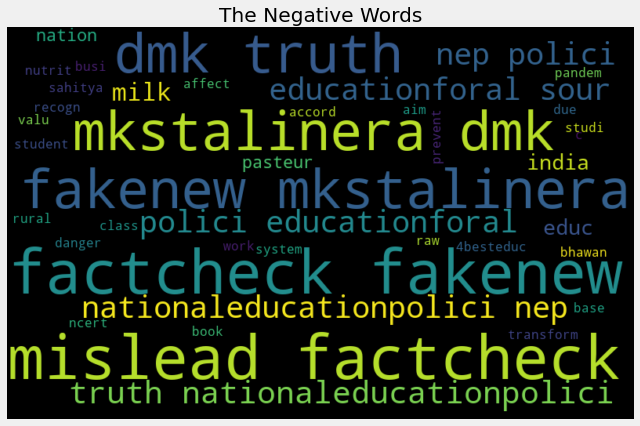

In [ ]:
negative_words =' '.join([text for text in df_train['Tweets'][df_train['Polarity'] < 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

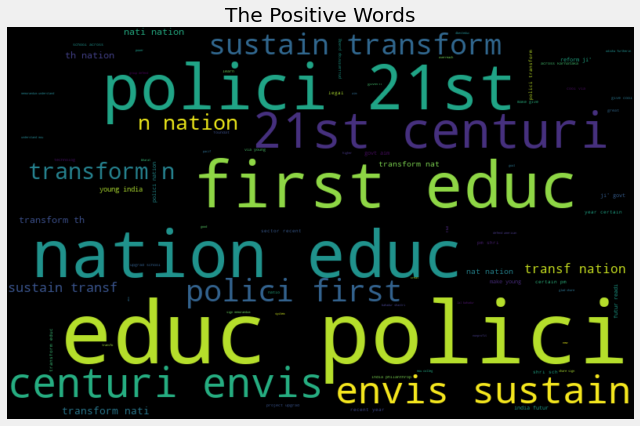

In [ ]:
positive_words =' '.join([text for text in df_train['Tweets'][df_train['Polarity'] > 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

##Text Vectorization By Bag Of Words

In [ ]:
# from sklearn import preprocessing
# from sklearn import utils

# lab_enc = preprocessing.LabelEncoder()
# encoded = lab_enc.fit_transform(df_train['Polarity'])
# # encoded
# print(utils.multiclass.type_of_target(df_train['Polarity'].astype('int')))
# print(utils.multiclass.type_of_target(encoded))


In [ ]:
df_train.head()

,Tweets,Polarity,Analysis
1093,provid univers access educ mission hon ’ ble p...,0.000,0
1094,... like nation educ polici 2020 pm shri schoo...,0.000,0
1095,nation educ polici 2020 aim transform india ’ ...,0.000,0
1096,provid univers access educ goal modi-l govern ...,0.000,0
1097,nation educ polici 2020 first educ polici 21st...,0.125,1


In [ ]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)

x = cv.fit_transform(df_train['Tweets']).toarray()
y = df_train.iloc[:, 2] #polarity

print(x.shape)
print(y.shape)

(1093, 446)
(1093,)


In [ ]:
df_train.head()

,Tweets,Polarity,Analysis
1093,provid univers access educ mission hon ’ ble p...,0.000,0
1094,... like nation educ polici 2020 pm shri schoo...,0.000,0
1095,nation educ polici 2020 aim transform india ’ ...,0.000,0
1096,provid univers access educ goal modi-l govern ...,0.000,0
1097,nation educ polici 2020 first educ polici 21st...,0.125,1


In [ ]:
# creating bag of words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(df_test['Tweets']).toarray()

print(x_test.shape)

(1093, 1021)


In [ ]:
# splitting the training data into train and valid sets
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, 
                                                      random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(819, 446)
(274, 446)
(819,)
(274,)


In [ ]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
# x_test = sc.transform(x_test)

##Using different algorithms to predict a tweets' sentiment

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_cm(cm):

  ax = sns.heatmap(cm, annot=True, cmap='Blues')

  ax.set_title('Confusion Matrix');
  ax.set_xlabel('\nPredicted sentiment')
  ax.set_ylabel('Actual sentiment');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['-1','0', '1'])
  ax.yaxis.set_ticklabels(['-1','0', '1'])

  ## Display the visualization of the Confusion Matrix.
  return plt.show()

In [ ]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, confusion_matrix

model_rm = RandomForestClassifier()
model_rm.fit(x_train, y_train)

y_pred = model_rm.predict(x_valid)

print("Training Accuracy :", model_rm.score(x_train, y_train))
print("Validation Accuracy :", model_rm.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred, average = None))

# confusion matrix
cm_r = confusion_matrix(y_valid, y_pred)
print(cm_r)

Training Accuracy : 1.0
Validation Accuracy : 0.9890510948905109
F1 score : [1.        0.9928401 0.976    ]
[[  2   0   0]
 [  0 208   0]
 [  0   3  61]]


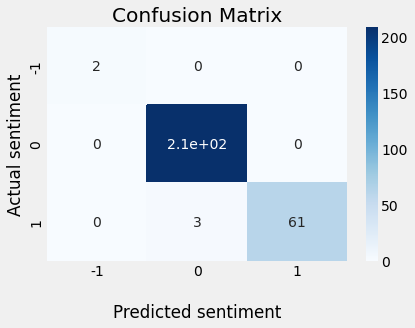

In [ ]:

visualize_cm(cm_r)

In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

y_pred = model_lr.predict(x_valid)

print("Training Accuracy :", model_lr.score(x_train, y_train))
print("Validation Accuracy :", model_lr.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred, average = None))

# confusion matrix
cm_lr = confusion_matrix(y_valid, y_pred)
print(cm_lr)

Training Accuracy : 1.0
Validation Accuracy : 0.9890510948905109
f1 score : [1.         0.99280576 0.97637795]
[[  2   0   0]
 [  0 207   1]
 [  0   2  62]]


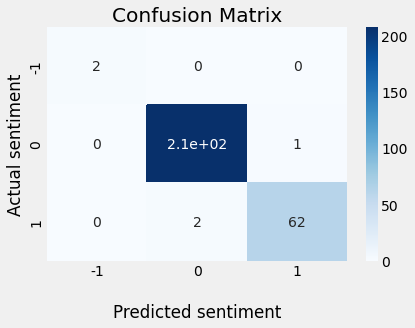

In [ ]:
visualize_cm(cm_lr)

In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

y_pred = model_dt.predict(x_valid)

print("Training Accuracy :", model_dt.score(x_train, y_train))
print("Validation Accuracy :", model_dt.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred, average = None))

# confusion matrix
cm_d = confusion_matrix(y_valid, y_pred)
print(cm_d)

Training Accuracy : 1.0
Validation Accuracy : 0.9890510948905109
f1 score : [1.         0.99280576 0.97637795]
[[  2   0   0]
 [  0 207   1]
 [  0   2  62]]


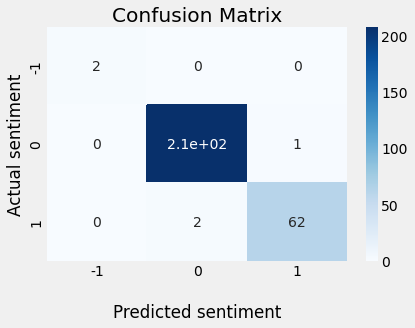

In [ ]:
visualize_cm(cm_d)

In [ ]:
#Support Vector Machine
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(x_train, y_train)

y_pred = model_svm.predict(x_valid)
print("Training Accuracy :", model_svm.score(x_train, y_train))
print("Validation Accuracy :", model_svm.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred, average = None))

# confusion matrix
cm_s = confusion_matrix(y_valid, y_pred)
print(cm_s)

Training Accuracy : 1.0
Validation Accuracy : 0.9890510948905109
f1 score : [1.        0.9928401 0.976    ]
[[  2   0   0]
 [  0 208   0]
 [  0   3  61]]


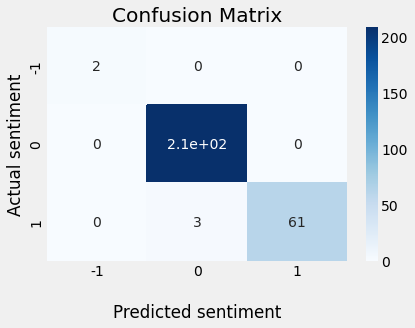

In [ ]:
visualize_cm(cm_s)

In [ ]:
#XGBoost
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

y_pred = model_xgb.predict(x_valid)

print("Training Accuracy :", model_xgb.score(x_train, y_train))
print("Validation Accuracy :", model_xgb.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :\n", f1_score(y_valid, y_pred, average = None))

# confusion matrix
cm_x = confusion_matrix(y_valid, y_pred)
print(cm_x)

Training Accuracy : 0.9877899877899878
Validation Accuracy : 0.9854014598540146
f1 score :
 [1.         0.99043062 0.96825397]
[[  2   0   0]
 [  0 207   1]
 [  0   3  61]]


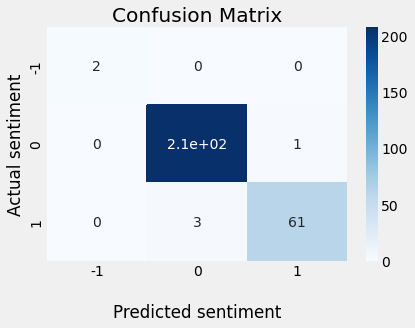

In [ ]:
visualize_cm(cm_x)

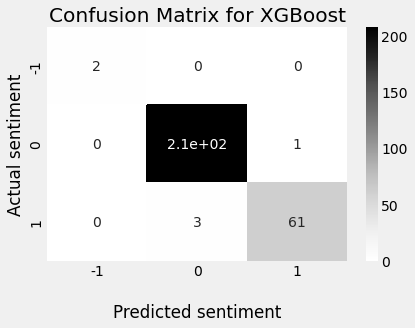

In [ ]:

ax = sns.heatmap(cm_x, annot=True, cmap='Greys')

ax.set_title('Confusion Matrix for XGBoost');
ax.set_xlabel('\nPredicted sentiment')
ax.set_ylabel('Actual sentiment');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['-1','0', '1'])
ax.yaxis.set_ticklabels(['-1','0', '1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

model_gnb = GaussianNB()
model_gnb.fit(x_train, y_train)
y_pred = model_gnb.predict(x_valid)

print("Training Accuracy :", model_gnb.score(x_train, y_train))
print("Validation Accuracy :", model_gnb.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred, average = None))

# confusion matrix
cm_n = confusion_matrix(y_valid, y_pred)
print(cm_n)

Training Accuracy : 0.6556776556776557
Validation Accuracy : 0.6496350364963503
f1 score : [0.04166667 0.70588235 0.96124031]
[[  2   0   0]
 [ 91 114   3]
 [  1   1  62]]


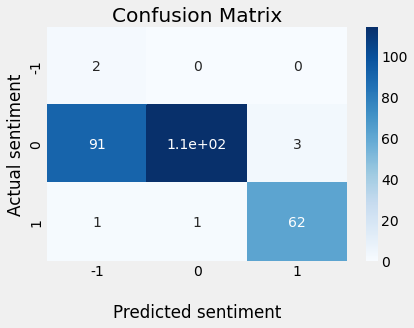

In [ ]:
visualize_cm(cm_n)

In [ ]:
#list of machine learning algorithms used
MLA = [RandomForestClassifier(), LogisticRegression(), DecisionTreeClassifier(), SVC(), XGBClassifier(), GaussianNB()]

In [ ]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    alg.fit(x_train, y_train)
    y_predicted = alg.predict(x_valid)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_valid, y_valid), 4)
    MLA_compare.loc[row_index, 'MLA Precision'] = precision_score(y_valid, y_predicted, average = 'weighted')
    MLA_compare.loc[row_index, 'MLA F1 score'] = f1_score(y_valid, y_predicted, average = 'weighted')

    
    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precision,MLA F1 score
1,LogisticRegression,1.0000,0.9891,0.989028,0.989021
3,SVC,1.0000,0.9891,0.989207,0.988959
0,RandomForestClassifier,1.0000,0.9854,0.985388,0.985321
2,DecisionTreeClassifier,1.0000,0.9854,0.985388,0.985321
4,XGBClassifier,0.9878,0.9854,0.985388,0.985321
5,GaussianNB,0.6557,0.6496,0.975474,0.760680


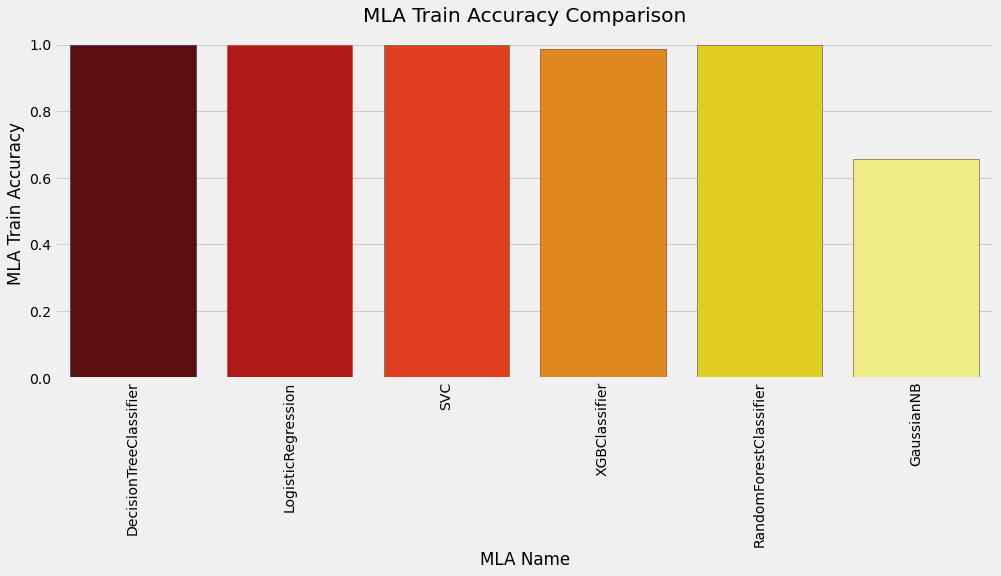

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

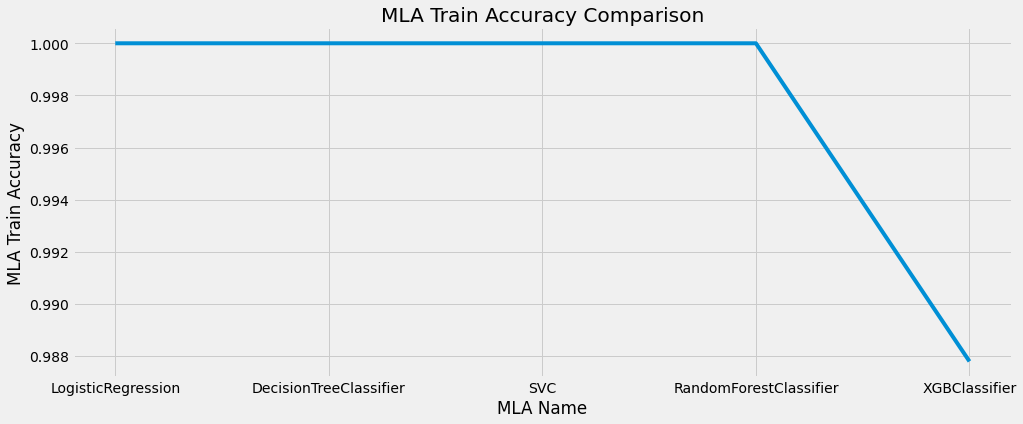

In [ ]:
plt.subplots(figsize=(15,6))
sns.lineplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot')
# plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

In [ ]:
# import seaborn as sns
# # dfm = MLA_compare.melt('MLA Name', var_name='cols', value_name='vals')
# # dfm.head(20)
# plt.subplots(figsize=(15,6))
# p = sns.lineplot(data=MLA_compare, palette='hot')
# p.set_xlabel("MLA", fontsize = 20)
# p.set_ylabel("Percentage", fontsize = 20)
# plt.title('MLA Train Accuracy Comparison')
# plt.show()

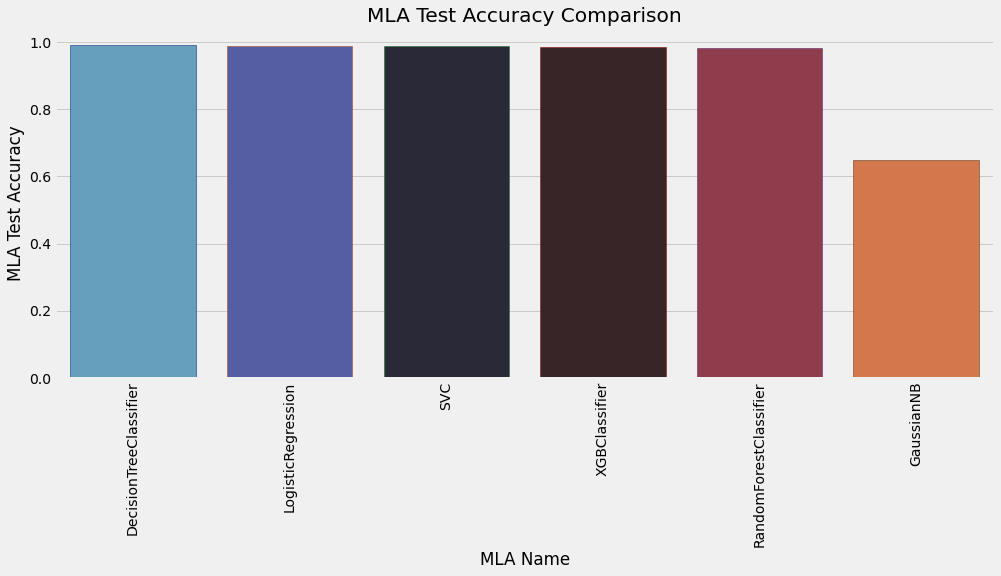

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='icefire',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

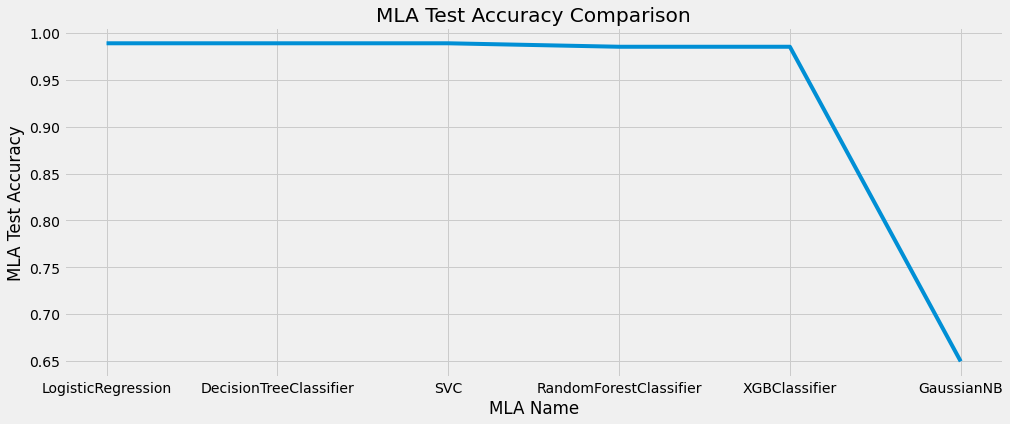

In [ ]:
plt.subplots(figsize=(15,6))
sns.lineplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot')
# plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

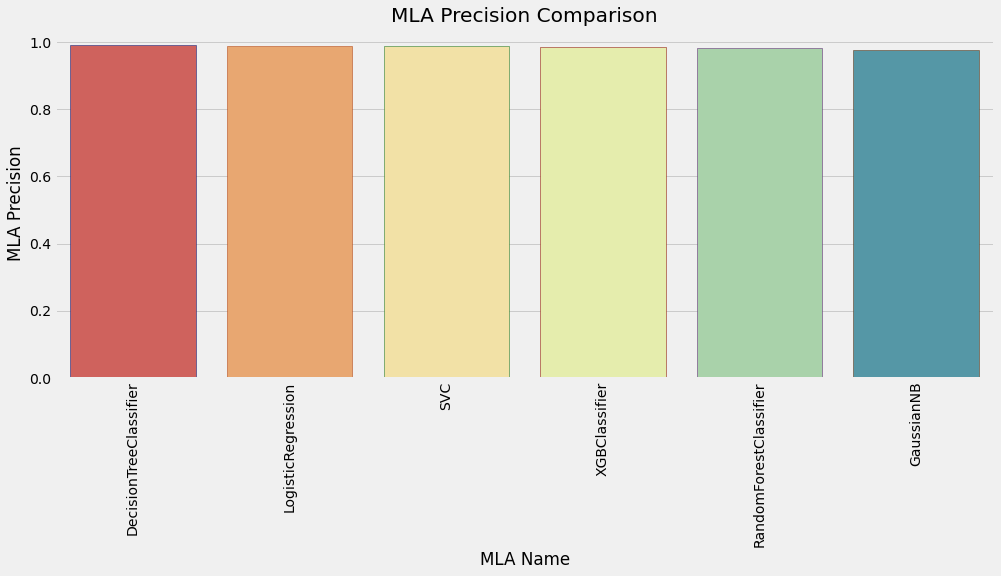

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Precision",data=MLA_compare,palette='Spectral',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Precision Comparison')
plt.show()

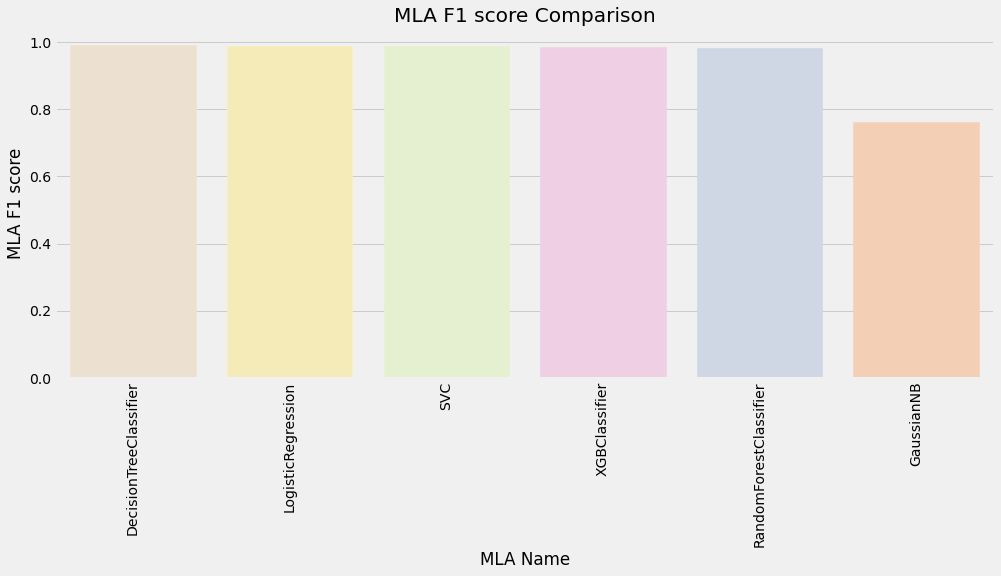

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA F1 score",data=MLA_compare,palette='Pastel2_r',edgecolor=sns.color_palette('Pastel2_r',7))
plt.xticks(rotation=90)
plt.title('MLA F1 score Comparison')
plt.show()

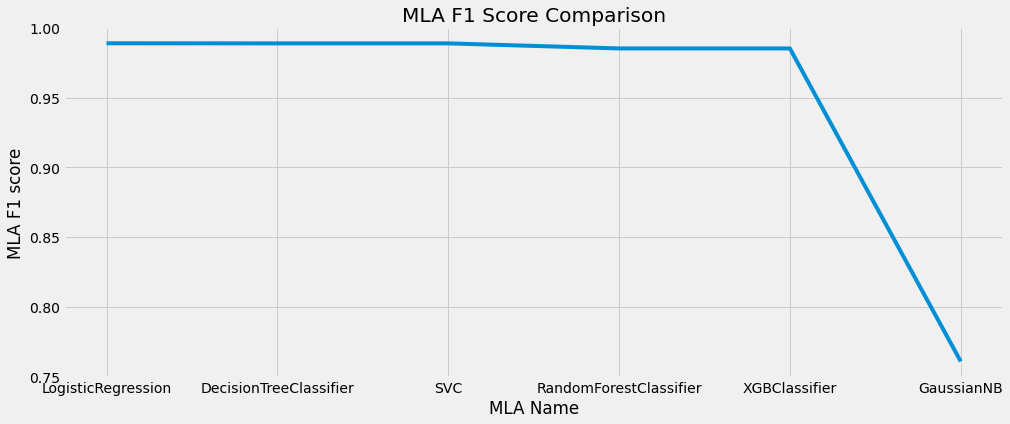

In [ ]:
plt.subplots(figsize=(15,6))
sns.lineplot(x="MLA Name", y="MLA F1 score",data=MLA_compare,palette='hot')
# plt.xticks(rotation=90)
plt.title('MLA F1 Score Comparison')
plt.show()

##Using different dataset to test the accuracy of model

In [ ]:
# #Load the data
from google.colab import files
uploaded = files.upload()

Saving twitter_training.csv to twitter_training.csv


In [ ]:
#Get the data
test_df = pd.read_csv('twitter_training.csv')
test_df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
test_df = test_df.drop(['2401', 'Borderlands'], axis=1)

In [ ]:
test_df.head()

,Positive,"im getting on borderlands and i will murder you all ,"
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [ ]:
test_df.columns =['Sentiment', 'Tweets']

In [ ]:
test_df = test_df.iloc[:,[1,0]]

In [ ]:
#Let's compute the negative, neutral and positive analysis
def getAnalysis(Sentiment):
  if Sentiment < 'Negative':
    return -1
  elif Sentiment == 'Neutral':
    return 0
  else:
    return 1
test_df['Analysis'] = test_df['Sentiment'].apply(getAnalysis)

test_df

,Tweets,Sentiment,Analysis
0,I am coming to the borders and I will kill you...,Positive,1
1,im getting on borderlands and i will kill you ...,Positive,1
2,im coming on borderlands and i will murder you...,Positive,1
3,im getting on borderlands 2 and i will murder ...,Positive,1
4,im getting into borderlands and i can murder y...,Positive,1
...,...,...,...
74676,Just realized that the Windows partition of my...,Positive,1
74677,Just realized that my Mac window partition is ...,Positive,1
74678,Just realized the windows partition of my Mac ...,Positive,1
74679,Just realized between the windows partition of...,Positive,1


In [ ]:
y_df = test_df['Analysis']
y_df.head()

0    1
1    1
2    1
3    1
4    1
Name: Analysis, dtype: int64

In [ ]:
test_df2 = test_df.drop(['Sentiment' , 'Analysis'], axis = 1)
test_df2['Tweets']

0        I am coming to the borders and I will kill you...
1        im getting on borderlands and i will kill you ...
2        im coming on borderlands and i will murder you...
3        im getting on borderlands 2 and i will murder ...
4        im getting into borderlands and i can murder y...
                               ...                        
74676    Just realized that the Windows partition of my...
74677    Just realized that my Mac window partition is ...
74678    Just realized the windows partition of my Mac ...
74679    Just realized between the windows partition of...
74680    Just like the windows partition of my Mac is l...
Name: Tweets, Length: 74681, dtype: object

In [ ]:
# model_rm.predict(test_df2)

In [ ]:
# model_lr.predict(test_df2)

In [ ]:
# model_dt.predict(test_df2)

In [ ]:
# model_svm.predict(test_df2)

In [ ]:
# model_xgb.predict(test_df2)

In [ ]:
# model_gnb.predict(test_df2)

In [ ]:
cv = CountVectorizer(max_features = 2500)
x_test2 = cv.fit_transform(test_df2['Tweets']).toarray()

print(x_test2.shape)

ValueError: ignored

In [ ]:
x_test2 = sc.transform(x_test2)

In [ ]:
#list of machine learning algorithms used
MLA = [RandomForestClassifier(), LogisticRegression(), DecisionTreeClassifier(), SVC(), XGBClassifier(), GaussianNB()]

In [ ]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    alg.fit(x_train, y_train)
    y_predicted = alg.predict(test_df2)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    # MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(test_df2, y_df), 4)
    MLA_compare.loc[row_index, 'MLA Precision'] = precision_score(y_df, y_predicted, average = 'weighted')
    MLA_compare.loc[row_index, 'MLA F1 score'] = f1_score(y_df, y_predicted, average = 'weighted')

    
    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ValueError: ignored

##Labeling Negative Positive and Neutral Sentiment using Afinn

In [1]:
# pip install afinn

In [2]:
# # Sentiment analysis with AFINN
# from afinn import Afinn
# afinn = Afinn()
# afinn_scores = [afinn.score(text) for text in df_train.Tweets]
# df_train['afinn'] = afinn_scores

In [3]:
# df_train.head()

In [4]:
# checking out the negative comments from the train set
# df_train[df_train['afinn'] < 0].head(10)

In [5]:
# df_train[df_train['afinn'] < 0].shape

In [6]:
# df_train[df_train['afinn'] == 0].head(10)

In [7]:
# df_train[df_train['afinn'] == 0].shape

In [8]:
# df_train[df_train['afinn'] > 0].head(10)

In [9]:
# df_train[df_train['afinn'] > 0].shape

In [10]:
# df_train['afinn'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

In [11]:
# df_train.groupby('afinn').describe()

Performing Sentimental Analysis